In [25]:
#The -q flag tells pip to run in quiet mode, which suppresses the output during installation.
!pip install country_converter -q


In [3]:
#Importing the requisite packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":300})

In [5]:
#package to be used to get country names in different languages and to map different country naming schemes to each other.
import country_converter as coco

In [6]:
#Loading the dataset
Salaries=pd.read_csv("C:\\Users\\Kevin\\Desktop\\Data Analytics Class\\Projects\\ds_salaries (1).csv")
Salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [7]:
#Understanding the Data
print("No of Rows and Columns", Salaries.shape)

No of Rows and Columns (3755, 11)


In [8]:
Salaries.info()
print("Number of missing data in the dataset:", Salaries.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
Number of missing data in the dataset: 0


In [9]:
print("Number of unique values in columns:\n\n", Salaries.nunique())

Number of unique values in columns:

 work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


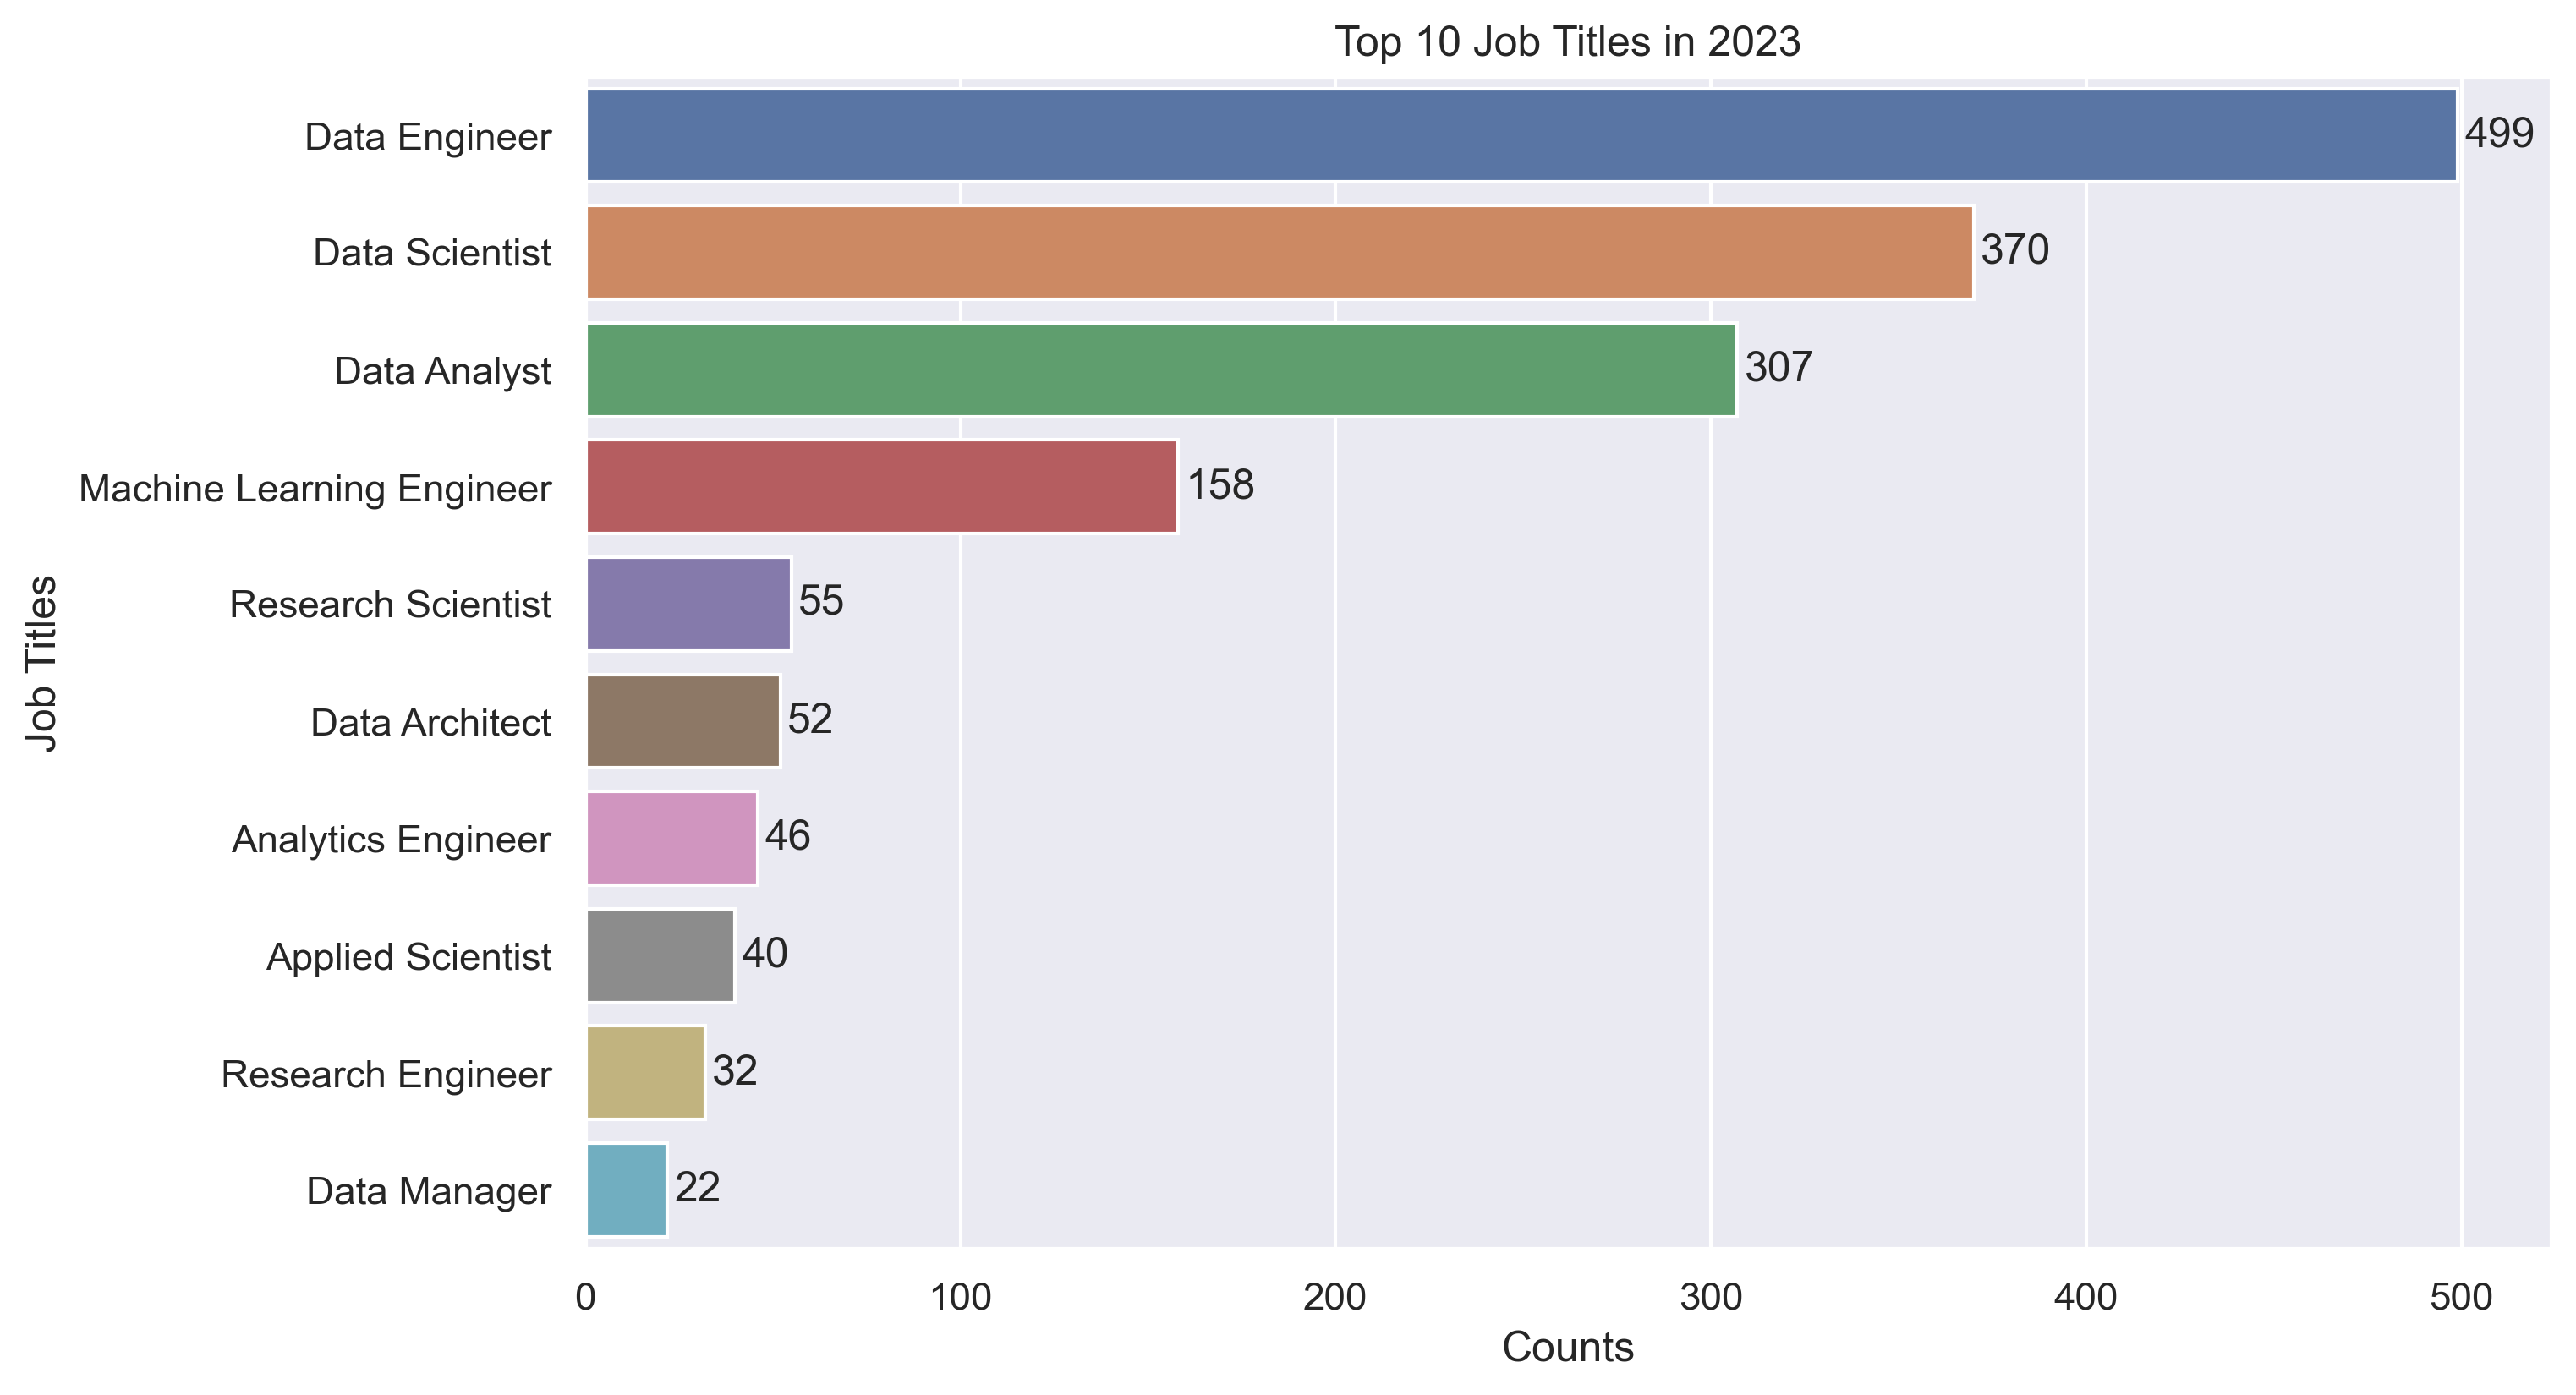

In [10]:
#Top 10 job titles in 2023 using the bar plot.
jobs = Salaries[Salaries['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=jobs, y=jobs['index'], x=jobs.job_title)
ax.set(ylabel='Job Titles', xlabel='Counts', title='Top 10 Job Titles in 2023')
for i, container in enumerate(ax.containers):
 ax.bar_label(container, labels=[str(jobs.iloc[i]['job_title'])], padding=2)


In [11]:
#Checking Experience levels
#First we determine the Unique values
Salaries['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [12]:
Salaries['experience_level'] = Salaries['experience_level'].replace('EN','Entry-level')
Salaries['experience_level'] = Salaries['experience_level'].replace('MI','Mid-level')
Salaries['experience_level'] = Salaries['experience_level'].replace('SE','Senior-level')
Salaries['experience_level'] = Salaries['experience_level'].replace('EX','Executive-level')


[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

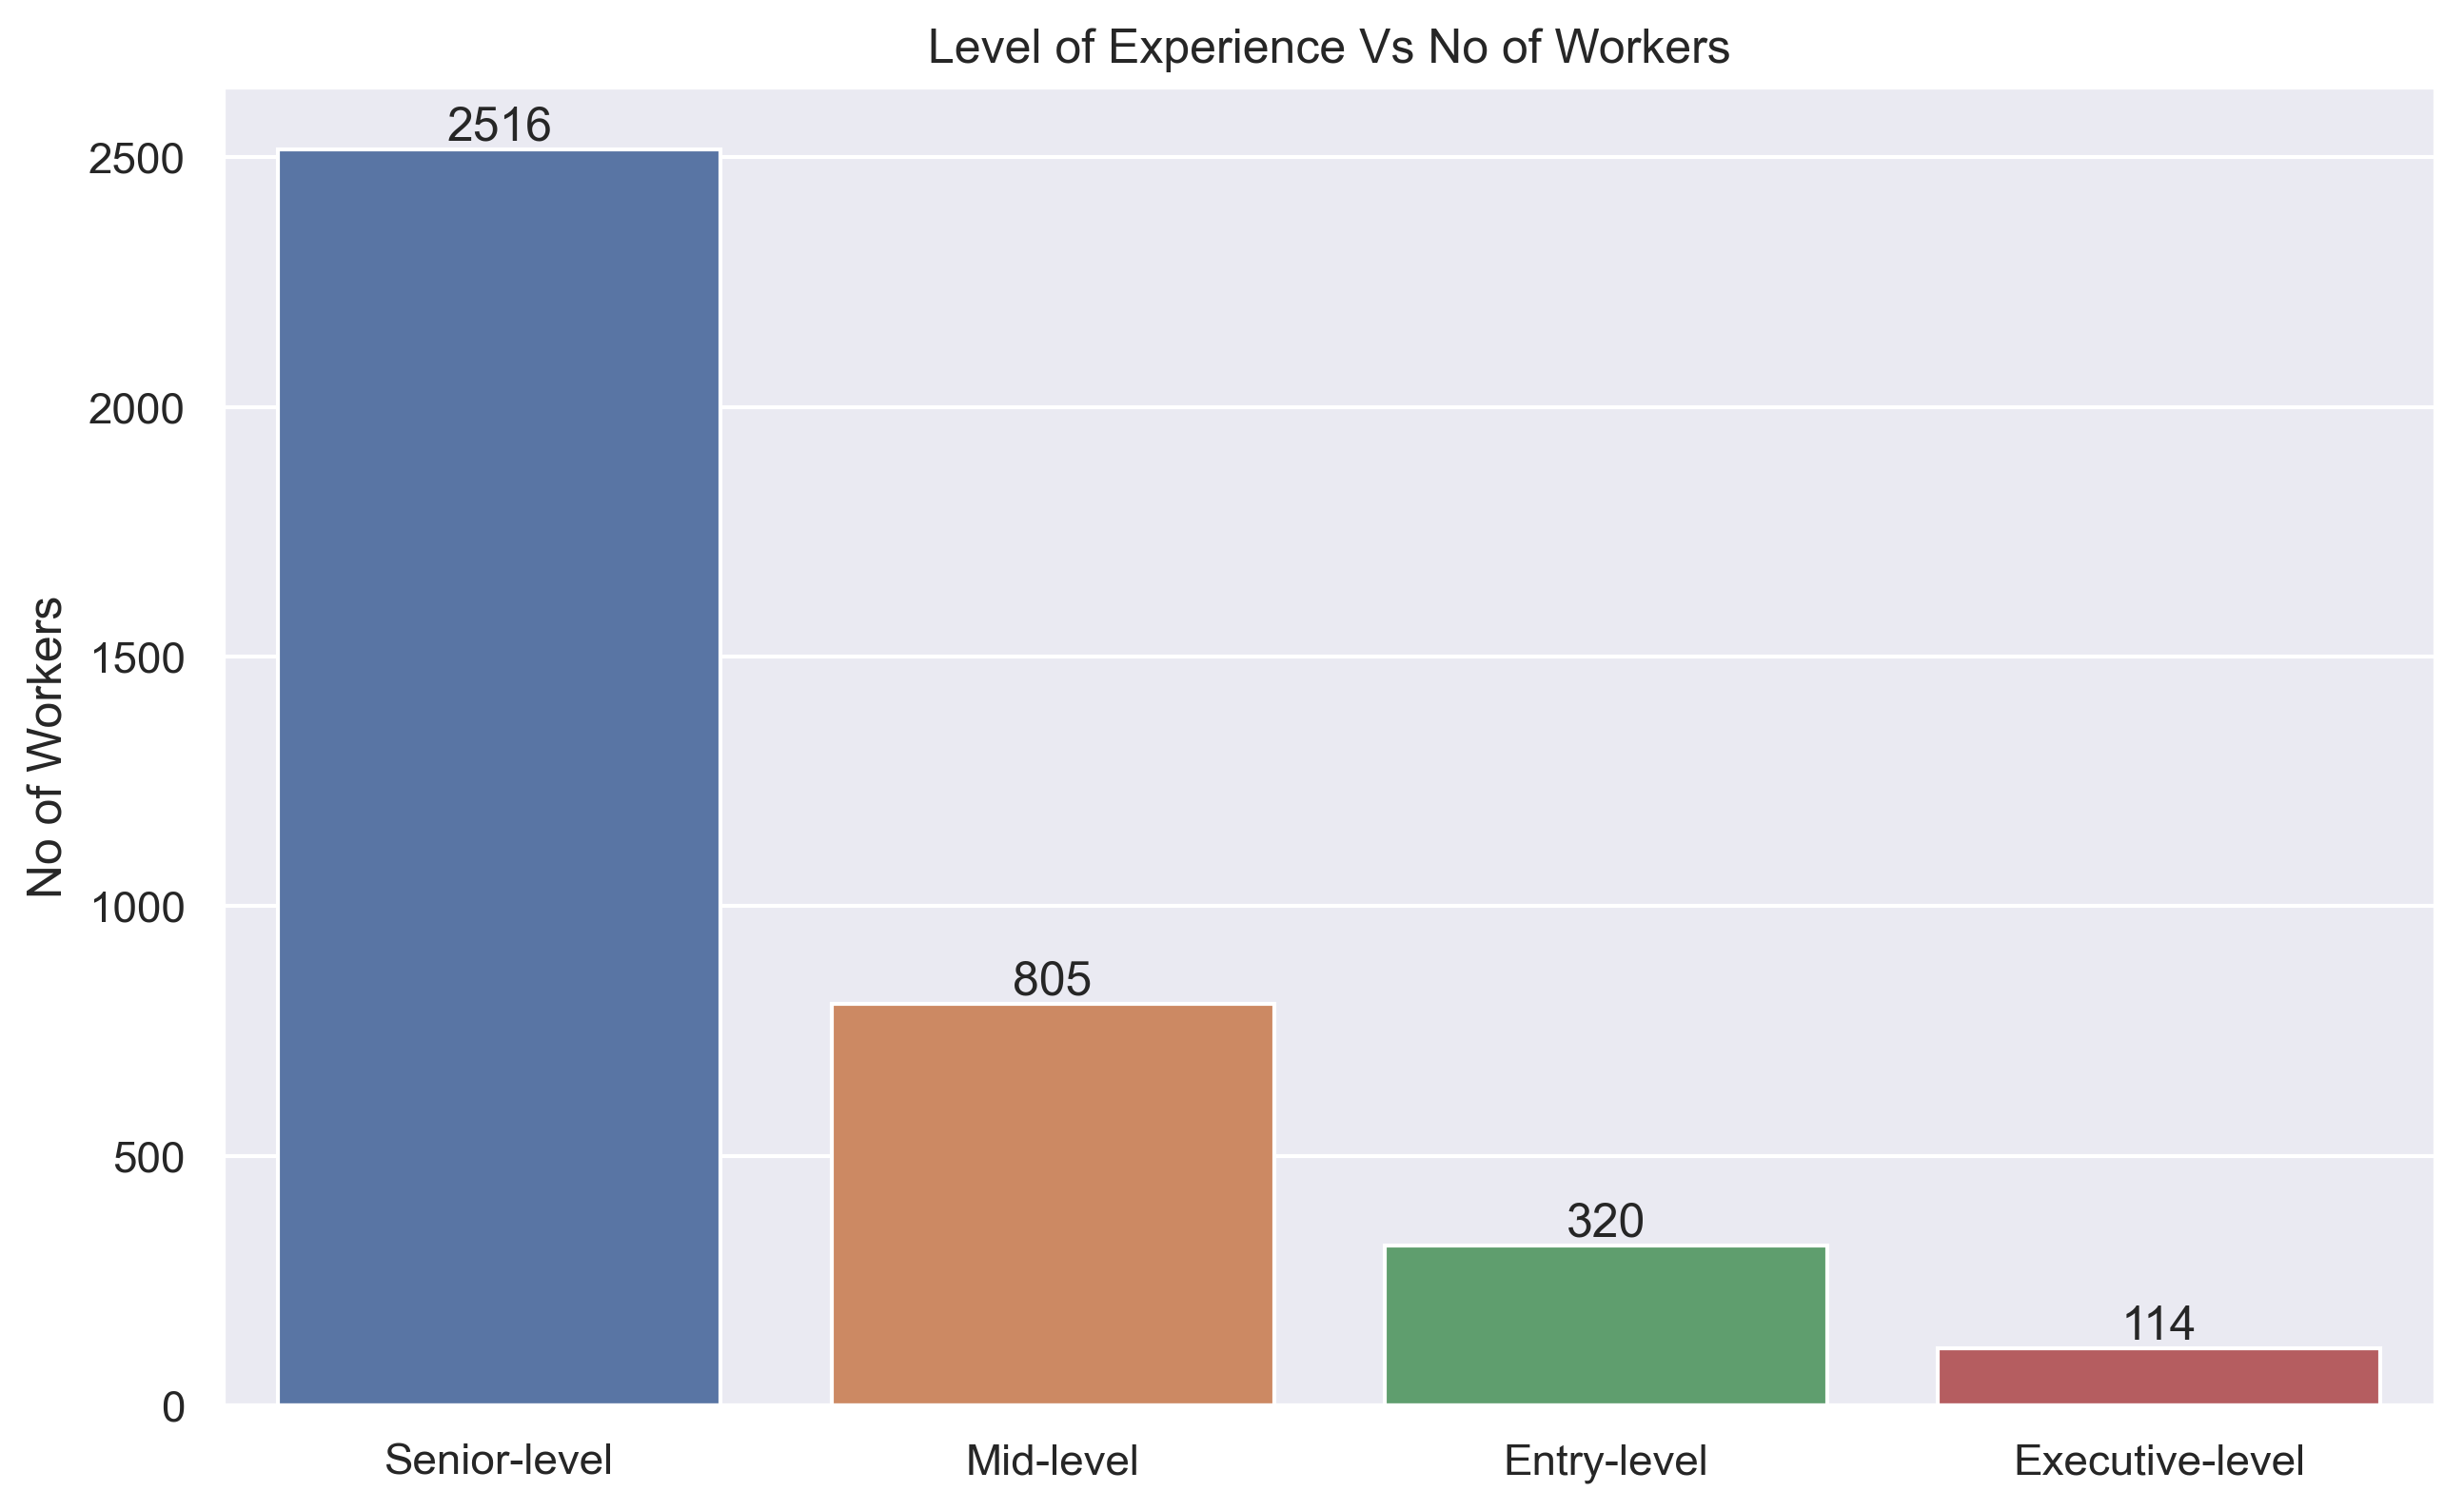

In [14]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = Salaries, x = Salaries.experience_level)
ax.set(xlabel='', ylabel='No of Workers', title='Level of Experience Vs No of Workers')
ax.bar_label(ax.containers[0])

In [14]:
#Analyzing Employment types
#First we check the Unique values in the Employment type column
Salaries['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [16]:
Salaries['employment_type'] = Salaries['employment_type'].replace('FT','full time')
Salaries['employment_type'] = Salaries['employment_type'].replace('PT','part time')
Salaries['employment_type'] = Salaries['employment_type'].replace('CT','Contractors')
Salaries['employment_type'] = Salaries['employment_type'].replace('FL','freelancer')

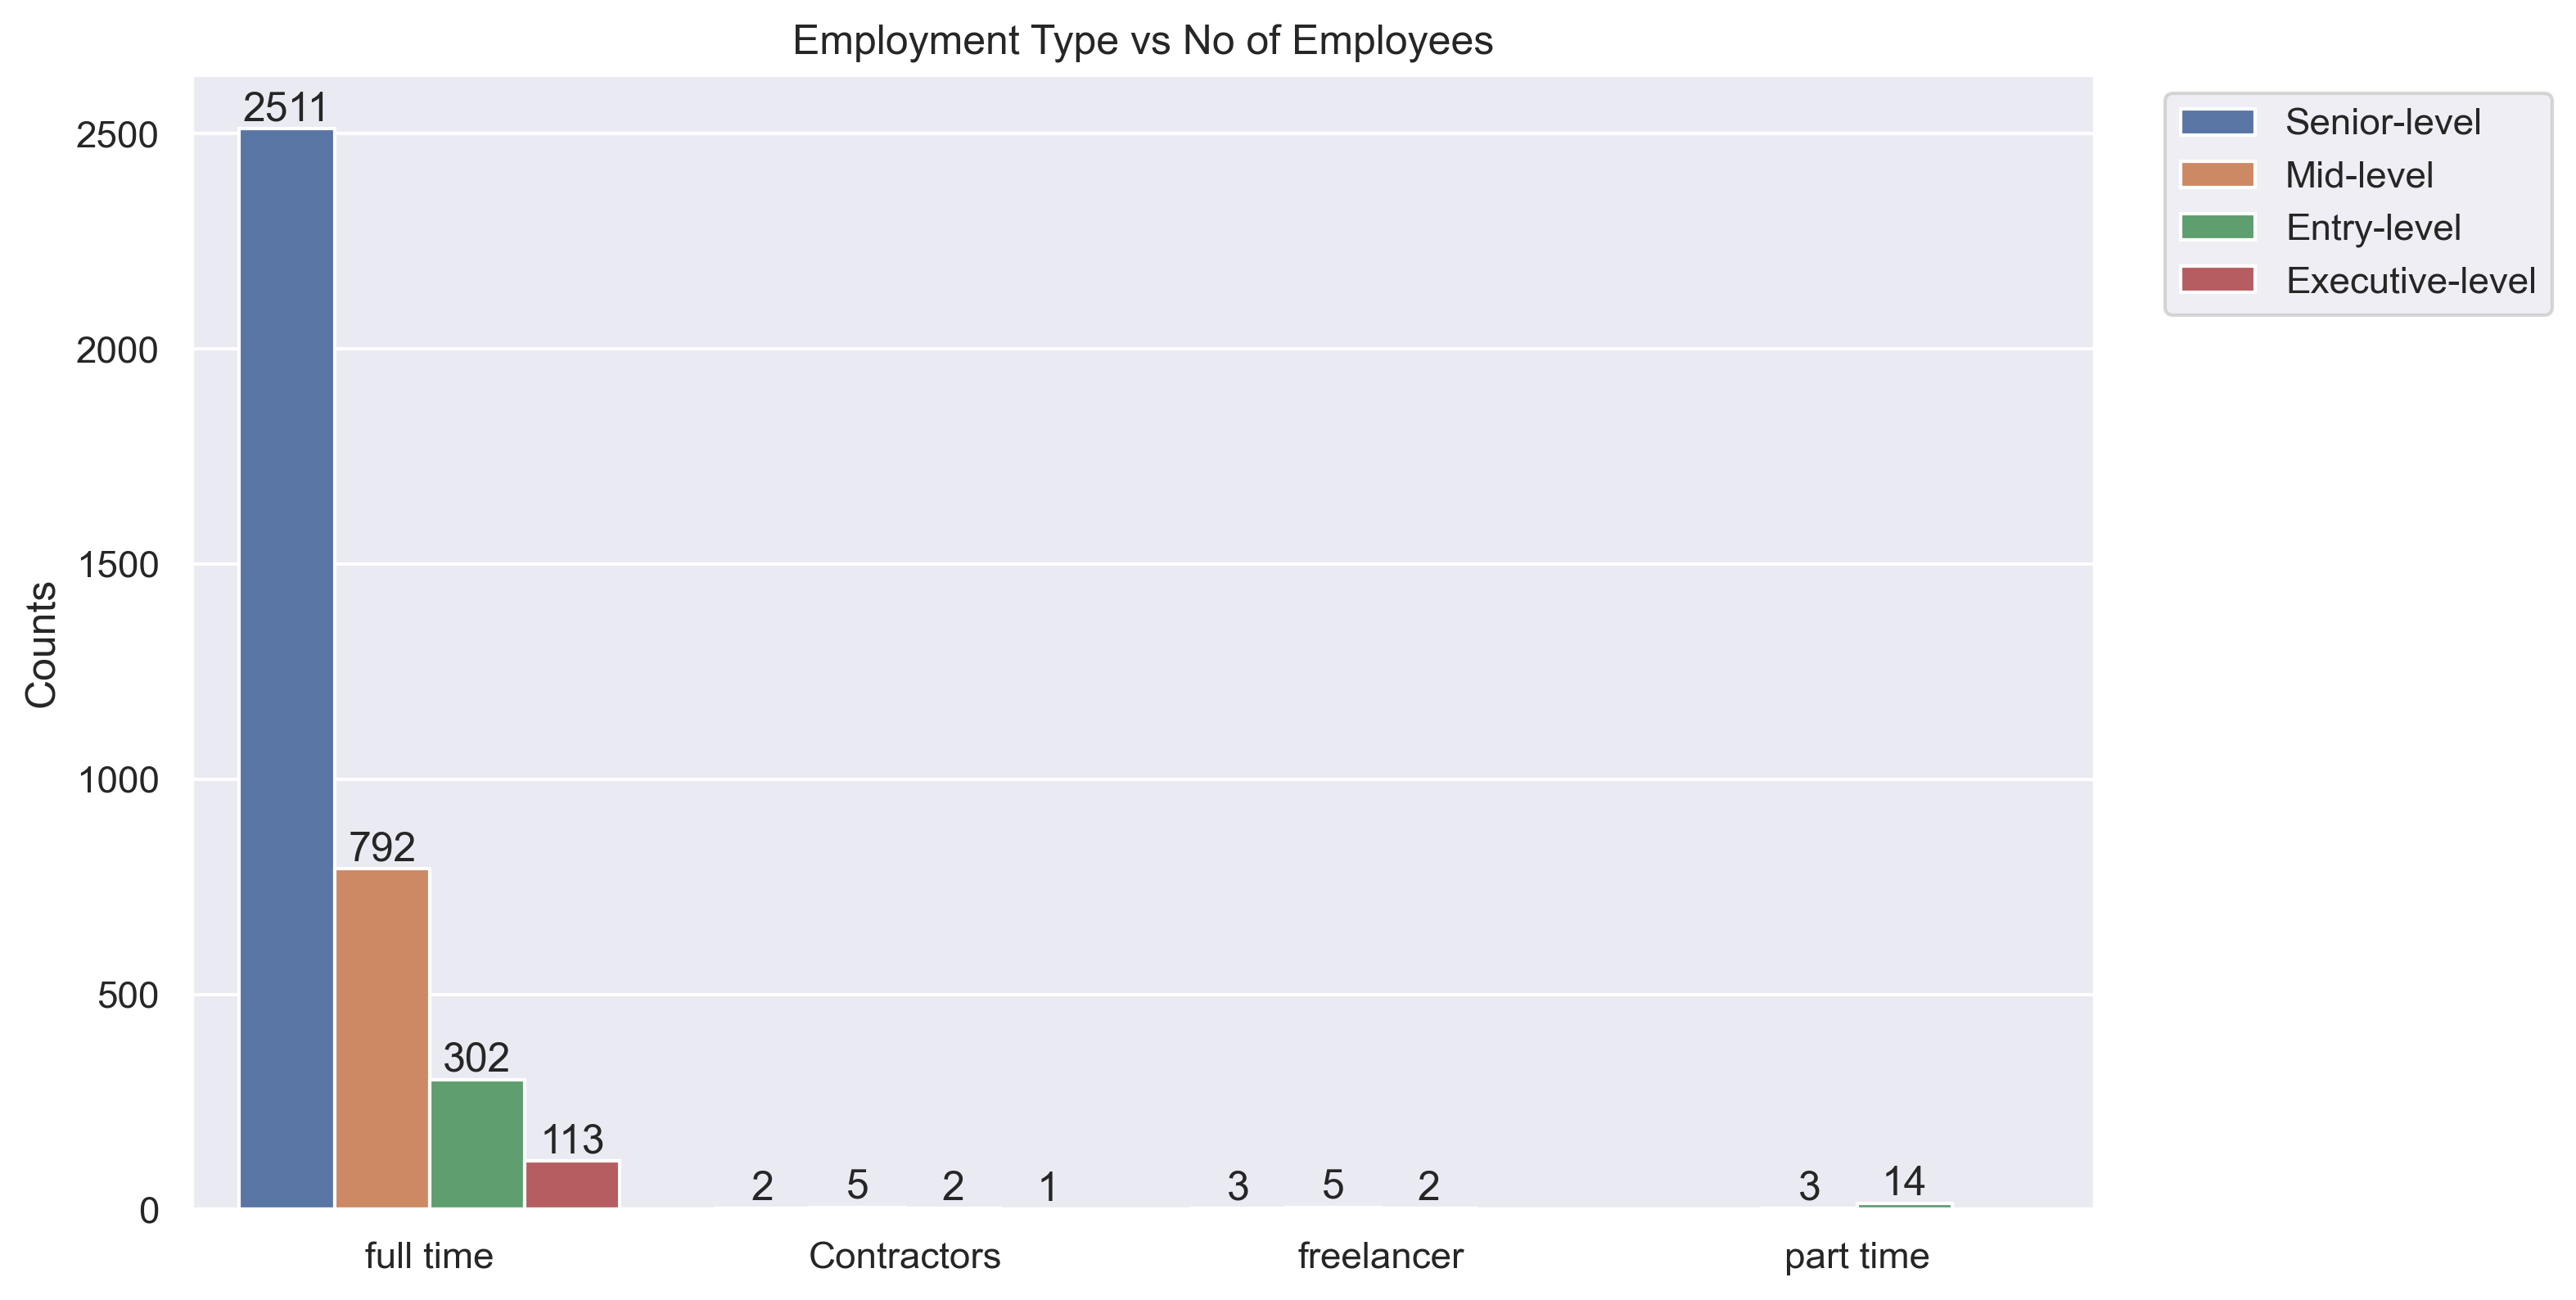

In [17]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = Salaries, x = Salaries.employment_type, hue = 'experience_level')
ax.set(xlabel='', ylabel='Counts', title='Employment Type vs No of Employees')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

[Text(2, 0, '375000'),
 Text(2, 0, '250000'),
 Text(2, 0, '212500'),
 Text(2, 0, '211254'),
 Text(2, 0, '198171'),
 Text(2, 0, '195141'),
 Text(2, 0, '192500'),
 Text(2, 0, '192420'),
 Text(2, 0, '191279'),
 Text(2, 0, '190264'),
 Text(2, 0, '190000'),
 Text(2, 0, '183858'),
 Text(2, 0, '175052'),
 Text(2, 0, '174150'),
 Text(2, 0, '163220'),
 Text(2, 0, '163108'),
 Text(2, 0, '161714'),
 Text(2, 0, '161214'),
 Text(2, 0, '160592'),
 Text(2, 0, '158352')]

<Figure size 7500x2700 with 0 Axes>

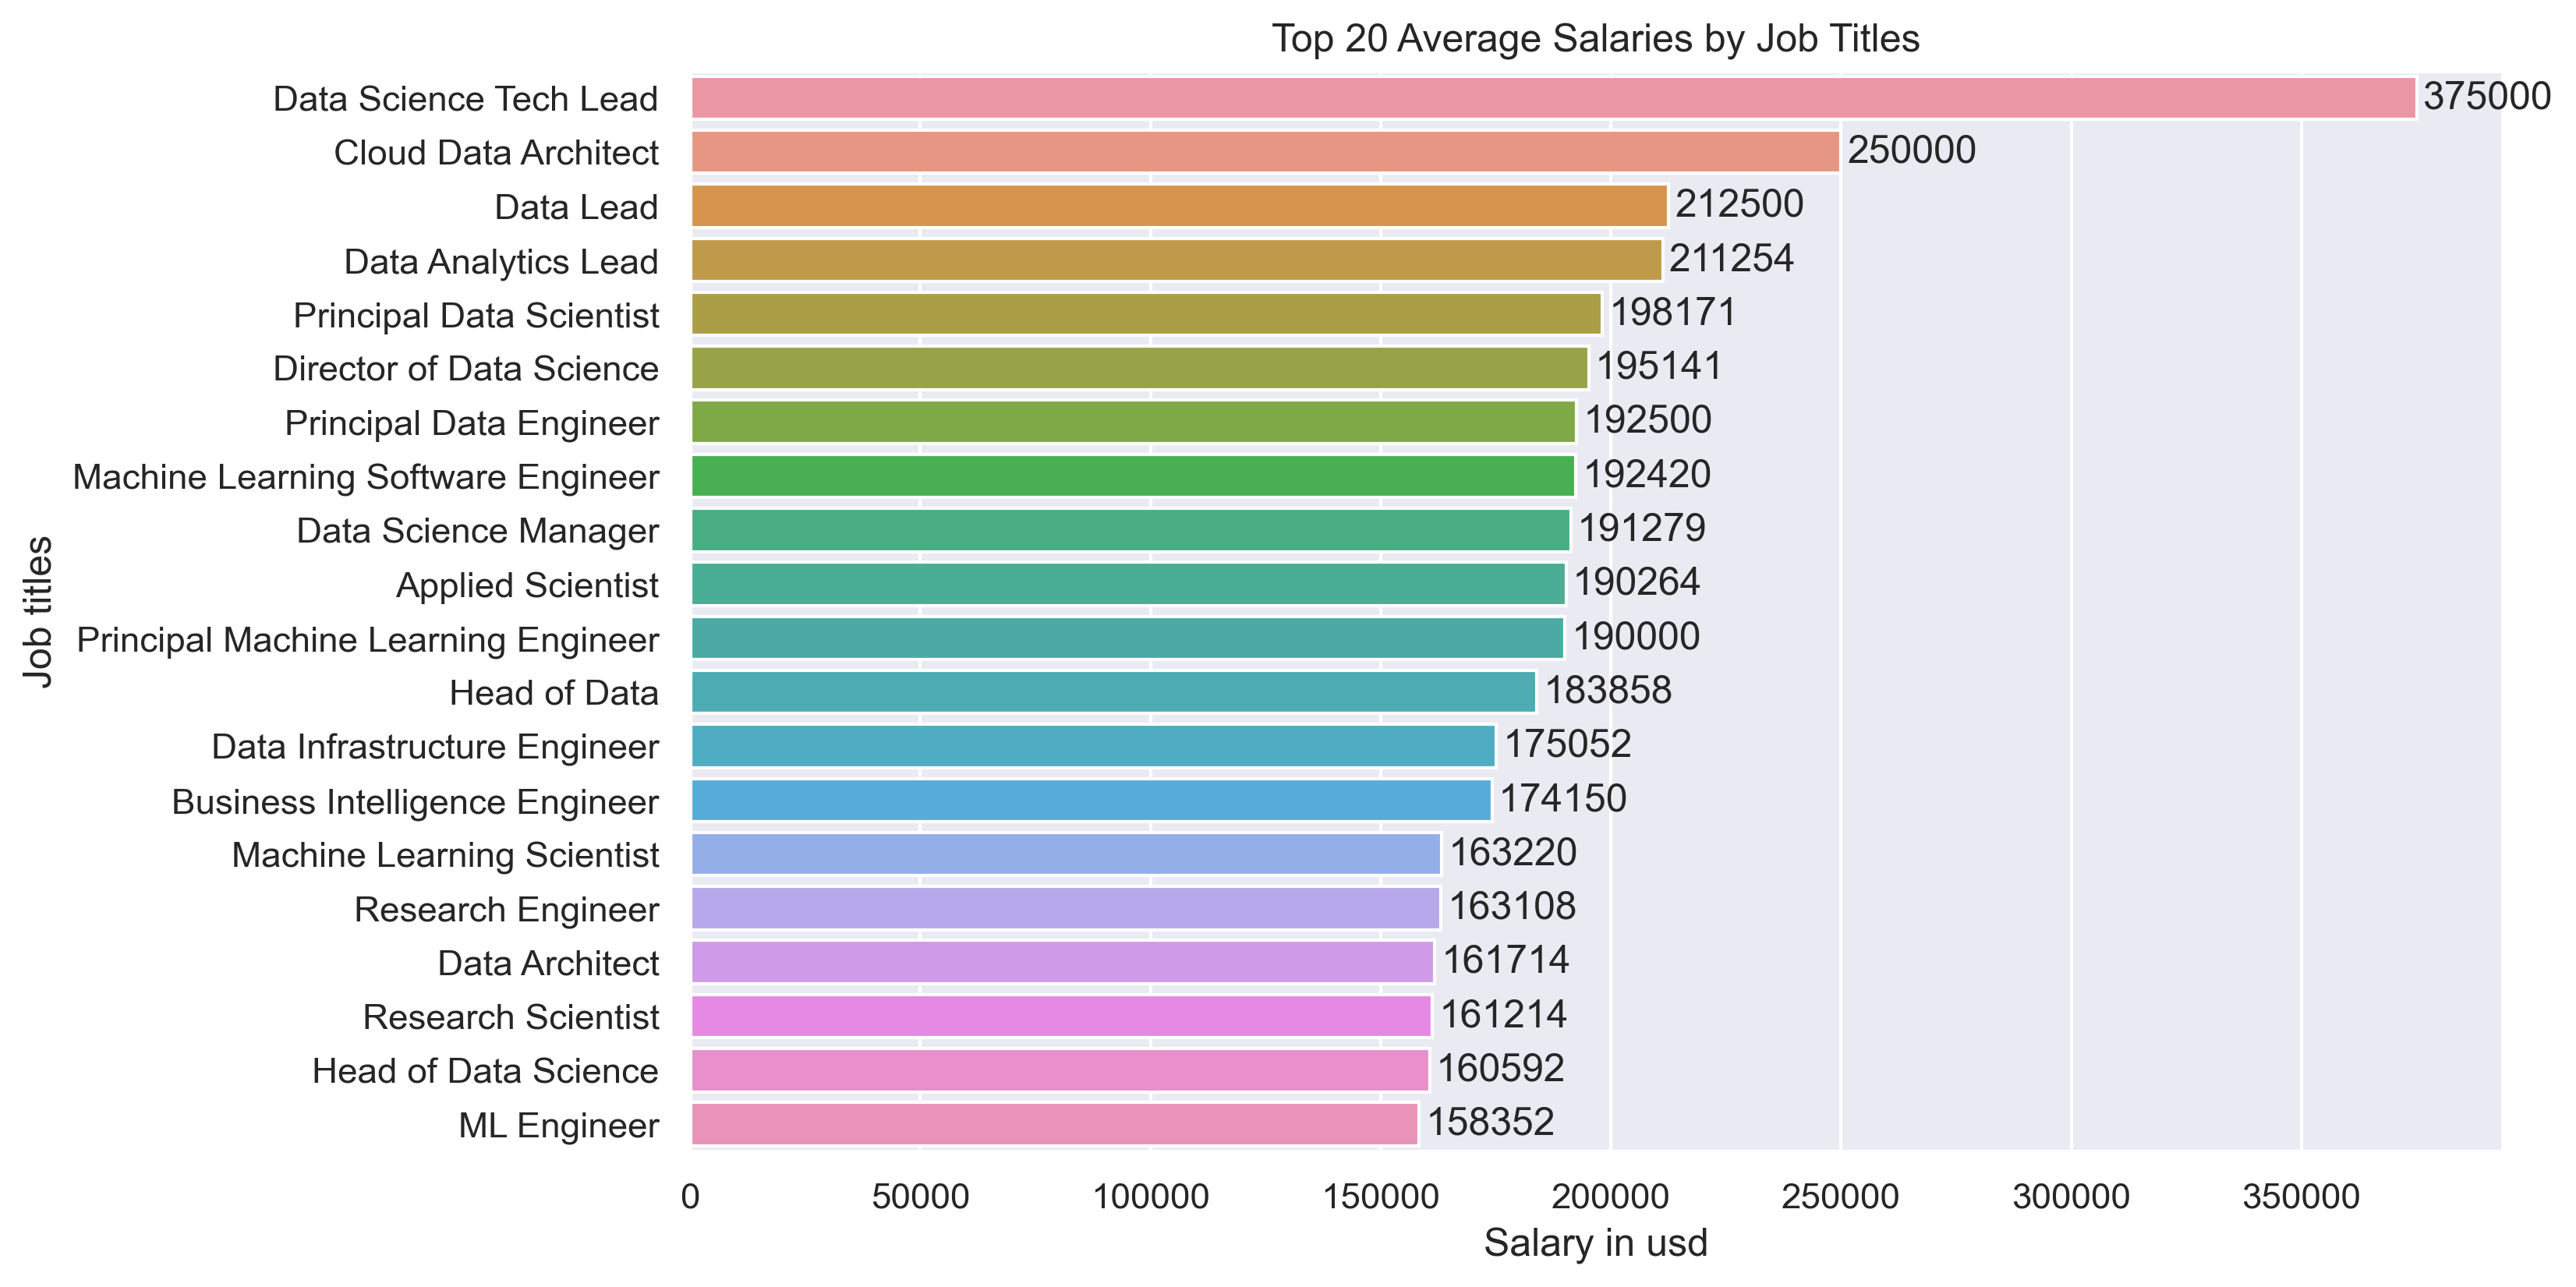

In [19]:
#Salaries by Job Titles
job_title_salary = Salaries['salary_in_usd'].groupby(Salaries['job_title']).mean().round(0).nlargest(20).sort_values(ascending = False).reset_index()
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = job_title_salary , y = job_title_salary.job_title, x = job_title_salary.salary_in_usd)
ax.set(ylabel='Job titles',xlabel='Salary in usd', title='Top 20 Average Salaries by Job Titles')
ax.bar_label(ax.containers[0], padding = 2)

[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

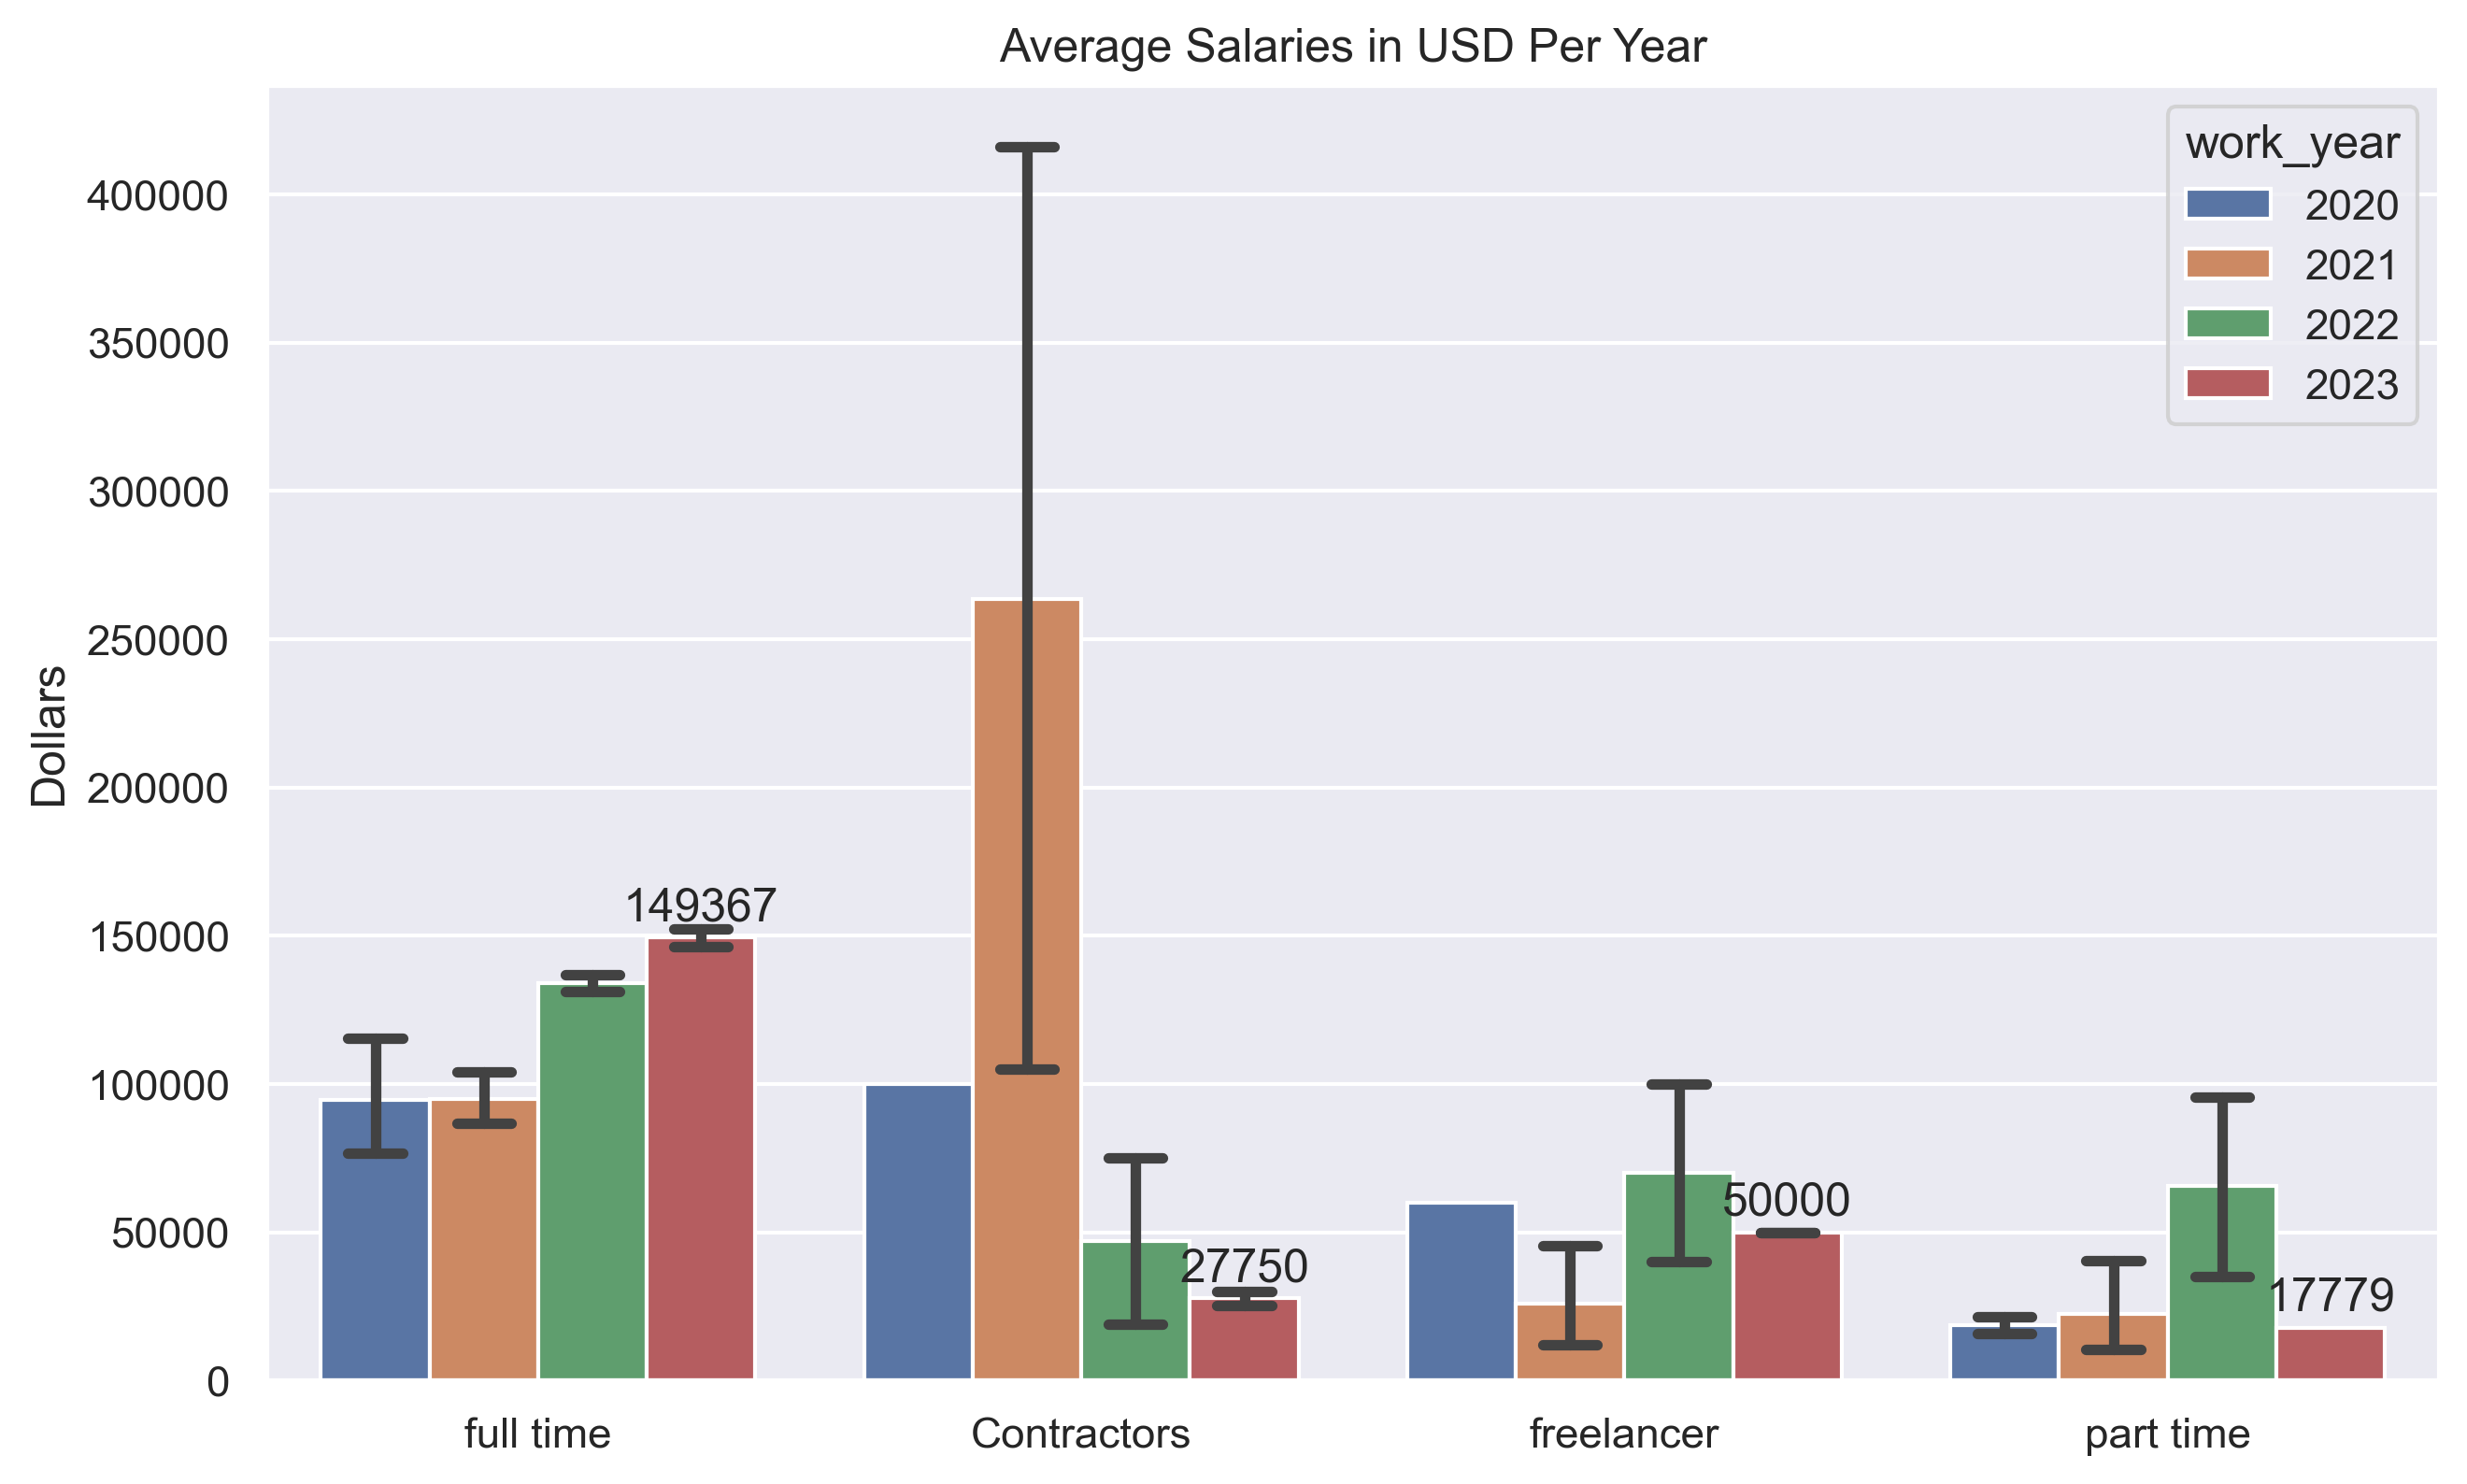

In [20]:
#Salaries by Employment Types
avg_salaries = Salaries.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=Salaries, x='employment_type', y='salary_in_usd', hue='work_year', capsize=0.1)
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in USD Per Year')
ax.bar_label(ax.containers[3], padding=2)


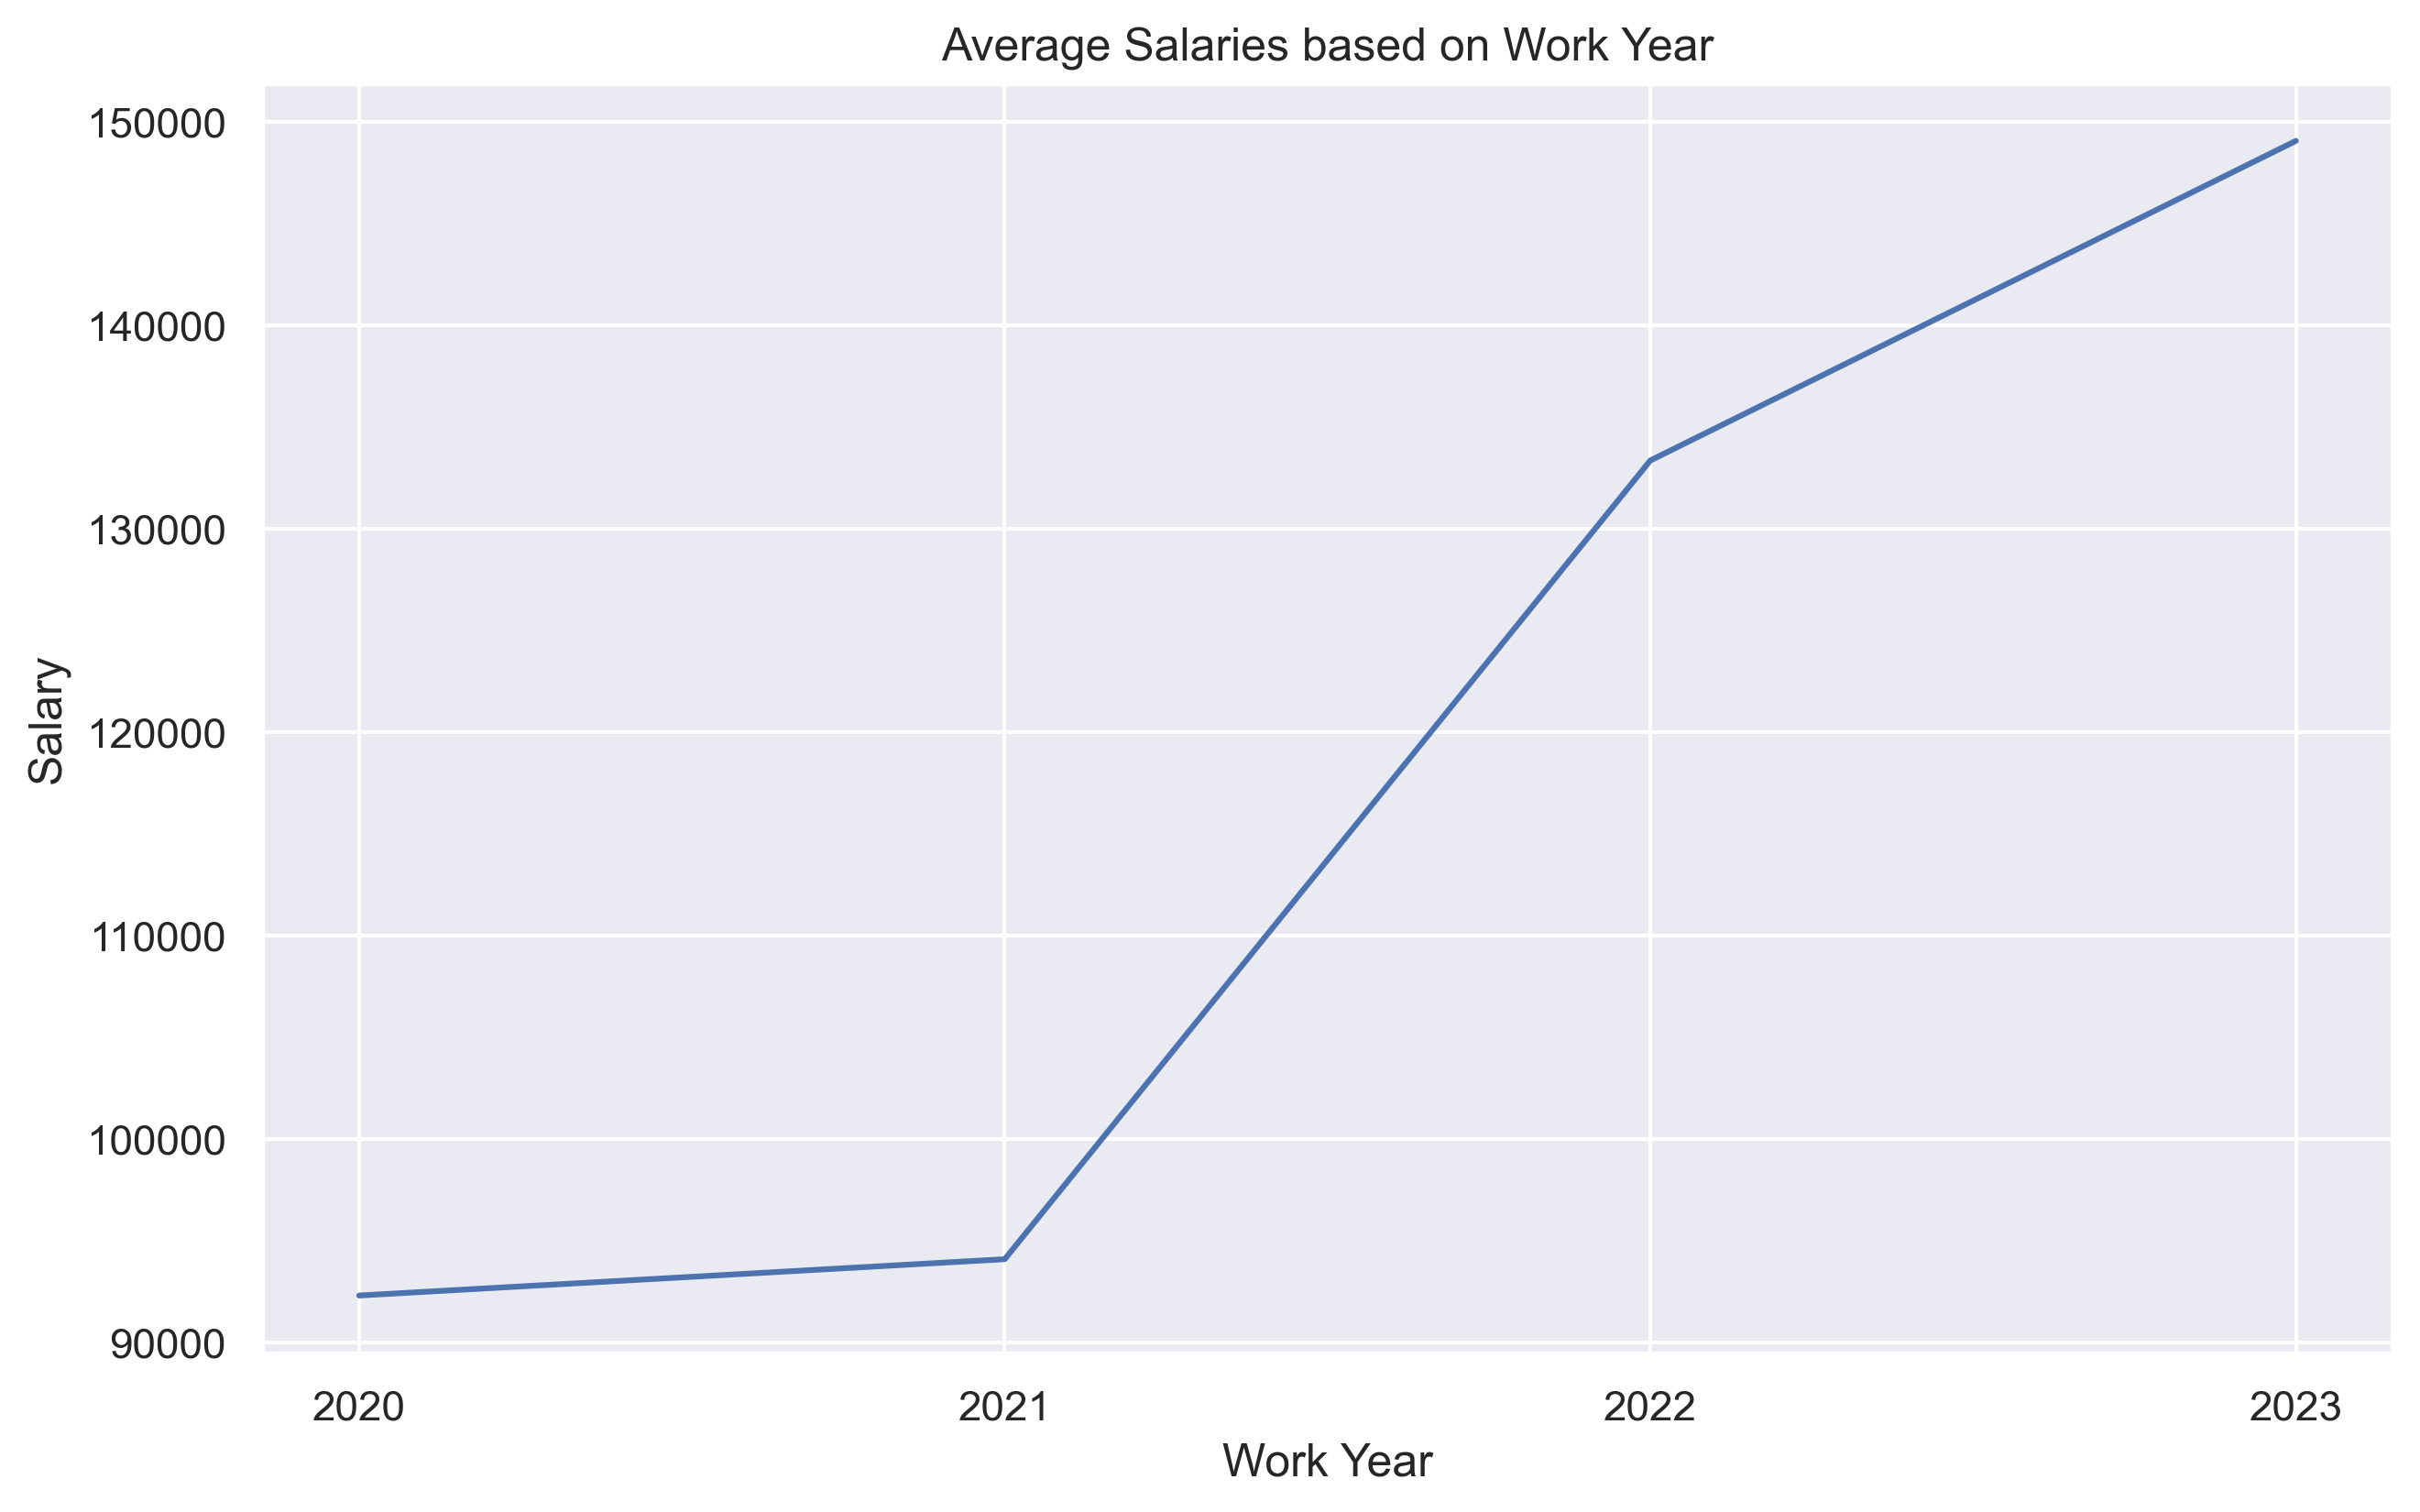

In [30]:
#Salaries by Work Years
year_based_salary=Salaries['salary_in_usd'].groupby(Salaries['work_year']).mean()
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()


In [21]:
#Remote Jobs by Locations
Remote = Salaries.groupby('company_location')['remote_ratio'].mean().reset_index()
Remote['company_location'] =  coco.convert(names = Remote['company_location'], to = "ISO3")
Remote.head()

,company_location,remote_ratio
0,ARE,66.666667
1,ALB,50.000000
2,ARM,0.000000
3,ARG,100.000000
4,ASM,66.666667


In [23]:
#Visualizing Remote job locations using Choropleth Maps
fig = px.choropleth(Remote,
                    locations = Remote.company_location, 
                    color = Remote.remote_ratio,                  
                    labels={'company_location':'Country','remote_ratio':'Remote Jobs Ratio'})
                    
fig.update_layout(title = "Remote Jobs VS Locations")
fig.show()